(1310, 1600, 3)


<IPython.core.display.Javascript object>


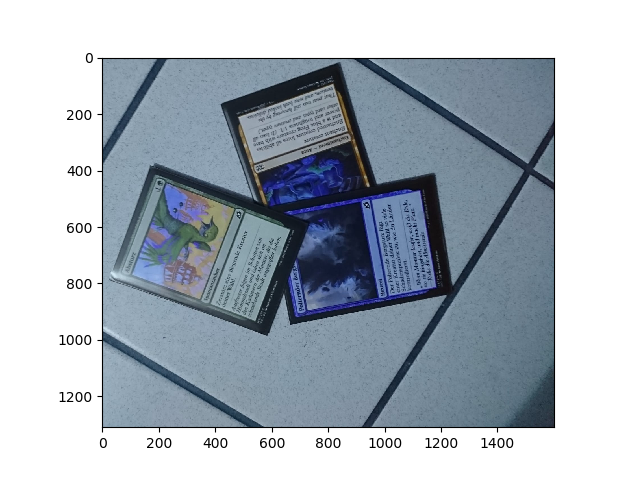

In [52]:
import cv2
import numpy as np
import random
%matplotlib notebook
import matplotlib.pyplot as plt

img = cv2.imread("Pictures/test.jpeg")

print(img.shape)
plt.imshow(img)


In [57]:
#calculate width and heights

width, height = img.shape[0], img.shape[1]
percent = 10

distortion_width_left = random.randint(0,width/percent)
distortion_width_right = random.randint(0,width/percent)
distortion_height_top = random.randint(0,height/percent)
distortion_height_down = random.randint(0,height/percent)



In [90]:
# calculate points

topleft = [0, 0]
topright = [width, 0]
downright = [width, height]
downleft = [0, height]

ptsin = np.float32([topleft, topright, downright, downleft])

distorion_direction = random.choice("left right top down".split())

if(distorion_direction == 'left'):
    topleft = [0+distortion_height_top  , 0]
    downleft = [width-distortion_height_down, height]
if(distorion_direction == 'right'):
    topright = [width+distortion_height_top, 0]
    downright = [width-distortion_height_down, height]
if(distorion_direction == 'top'):
    topleft = [0+distortion_width_left, 0]
    topright = [width-distortion_width_right, 0]
if(distorion_direction == 'down'):
    downright = [width-distortion_width_left, height]
    downleft = [0+distortion_width_right, height]

ptsout = np.float32([topleft, topright, downright, downleft])
print(distorion_direction)


right


<IPython.core.display.Javascript object>


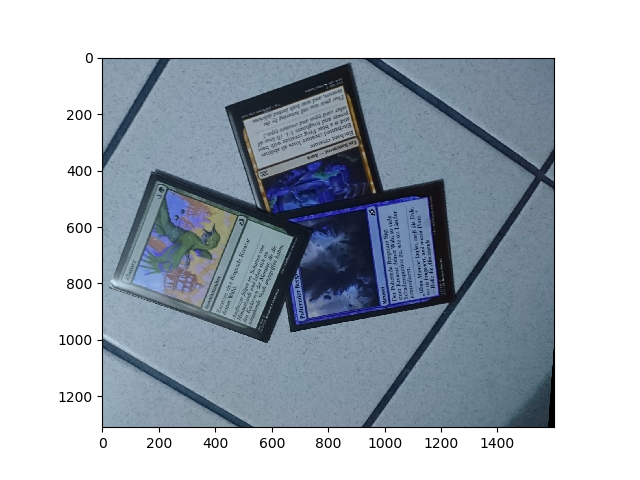

In [91]:
# Image Distortion

matrix = cv2.getPerspectiveTransform(ptsin, ptsout)
imgOutput = cv2.warpPerspective(img, matrix, (height,width))
plt.imshow(imgOutput)